In [1]:
import os, json
import ruamel.yaml as yaml
import numpy as np
import matplotlib
from matplotlib import transforms
import matplotlib.pyplot as plt
matplotlib.rcParams["text.usetex"] = True
import tikzplotlib

from monty.json import MontyDecoder, MontyEncoder
from quotas.core import QuotasCalculator
from pymatgen import Element, Spin
from pymatgen.electronic_structure.plotter import DosPlotter

from support_functions import get_smeared_densities, find_nearest

data_dir = "../data"
figures_dir = "../../../figures/quotas"

basecolor1 = "#000000"
basecolor2 = "#004949"
basecolor3 = "#009292"
basecolor4 = "#FF6DB6"
basecolor5 = "#FFB6DB"
basecolor6 = "#480091"
basecolor7 = "#006DDB"
basecolor8 = "#B56DFF"
basecolor9 = "#6DB6FF"
basecolor10 = "#B6DBFF"
basecolor11 = "#920000"
basecolor12 = "#924800"
basecolor13 = "#DB6D00"
basecolor14 = "#24FF22"
basecolor15 = "#FEFF6D"
basecolor16 = "#FE6100"
basecolor17 = "#0DA35A"
basecolor18 = "#3373A8"
basecolor19 = "#B93033"

color0 = basecolor1
color1 = basecolor18
color2 = basecolor17
color3 = basecolor19
color4 = basecolor2
color5 = basecolor6

# Load the experimental data
with open(os.path.join(data_dir, "experimental_data.json"), "r") as file:
    exp_data = json.loads(file.read(), cls=MontyDecoder)

# Load the dictionary of all the structures for which we have calculated the required properties
with open(os.path.join(data_dir, "structure_dict.yaml"), "r") as file:
    structure_dict = yaml.safe_load(file.read())

In [2]:
# Define the effective ionization energies of the rare gas ions
ionization_energies = {
    "He": 24.56 - 2,
    "Ne": 21.56 - 1,
    "Ar": 15.76 - 0.5,
    "Kr": 12.00,
    "Xe": 10.13
}

# Set the density smearing for the figures
density_smearing = 0.2

def compare_to_exp(element, surface, ion, plasmon_pars=None,
                   smearing=0.01, output_file="temp.tex"):
    
    quotas = QuotasCalculator.from_file(
        os.path.join(data_dir, element + "_" + surface + "_pbe.json"),
        energy_spacing_override=0.01
    )
    if plasmon_pars == "None":
        quotas._surf_plas_prob = None
    elif plasmon_pars is not None:
        quotas.set_up_plasmon_probabilities(**plasmon_pars)

    calc_see = quotas.calculate_yield(ionization_energies[ion])
    exp_see = exp_data[element][ion]

    rc_font_dict = {"size": 20, "family": "sans-serif", 
                    "sans-serif": ['Helvetica', 'Verdana', 'Tahoma', 'Lucida Grande']}
    plt.rc("font", **rc_font_dict)

    # Plot the yield densities
    fig, ax = plt.subplots()
    ax.plot(exp_see["energy"], exp_see["yield"], "o", 
            color=color0, markersize=2)
    ax.plot(calc_see["energy"], 
             get_smeared_densities(calc_see["energy"], 
                                   calc_see["yield"]*1e3, smearing),
            color=color5, linewidth=3)

    font_dict = {"size": 20, "family": "sans-serif", "name": 'DejaVu Sans'}

    # Configure the axes
    ax.set_xlim([0, max(exp_see["energy"])])
    ax.set_xlabel(r"$\epsilon_k$ (eV)")
    ax.set_ylabel(r"$10^3 N_0 (\epsilon_k)$ (eV\textsuperscript{-1})")
    ax.set_title(ion + r"$^+ \rightarrow$" + element + "(" + surface + ")", 
                 fontdict=font_dict)
    plt.legend(["Experiment", "Calculation"], fontsize=14)
    tikzplotlib.save(output_file)

# QUOTAS-Figures

In this notebook we'll generate the figures for the QUOTAS chapter of the thesis. The notebook is structure to follow the order of the figures in the corresponding chapter:

- [Metals](#Metals)
- [Plasmons](#Plasmons)

## Metals

To introduce the need for plasmons, we want to show the result of our model for Mg without any plasmonic excitations.

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get_xticks("minor"), obj.get_xticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:216: MatplotlibDeprecationWarning: Passing the minor parameter of get_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor y", obj.get_yticks("minor"), obj.get_yticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get

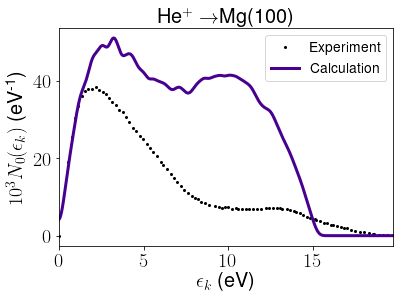

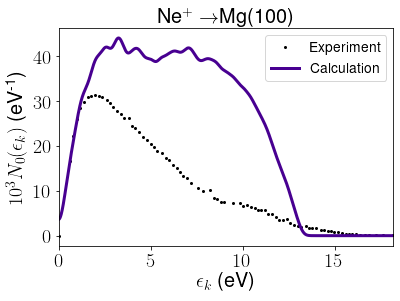

In [3]:
compare_to_exp("Mg", "100", "He", 
               plasmon_pars={"bulk_parameter": 0, "surface_parameter": 0},
               smearing=density_smearing,
               output_file=os.path.join(figures_dir, "HeMg_noplasmon.tex"))

compare_to_exp("Mg", "100", "Ne", 
               plasmon_pars={"bulk_parameter": 0, "surface_parameter": 0},
               smearing=density_smearing,
               output_file=os.path.join(figures_dir, "NeMg_noplasmon.tex"))

## Plasmons

Here the figures to explain the influence of the plasmon excitations on the yield results are generated.

#### DOS of Mg (100)

To demonstrate the need for another plasmon excitation mechanism other than the resonant surface one, we want to plot the DOS of Mg relative to the vacuum level, to demonstrate that a resonant mechanism would have very little effect on the calculations.

In [4]:
element = "Mg"
surface = "100"

quotas = QuotasCalculator.from_file(
    os.path.join(data_dir, element + "_" + surface + "_pbe.json")
)

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get_xticks("minor"), obj.get_xticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:216: MatplotlibDeprecationWarning: Passing the minor parameter of get_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor y", obj.get_yticks("minor"), obj.get_yticklabels("minor")


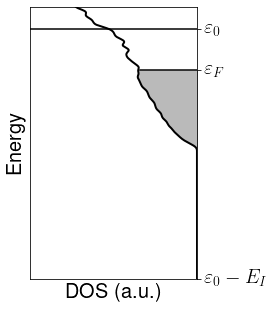

In [5]:
rc_dict = {"font.size": 20, "font.family": "sans-serif", 
           "font.sans-serif": ['Helvetica', 'Verdana', 'Tahoma', 'Lucida Grande']}

plt.rcParams.update(rc_dict)

fig, ax = plt.subplots(figsize=(3, 5)); fig.patch.set_alpha(0.)

base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)

fermi_dos = quotas.cdos.get_interpolated_value(quotas.cdos.efermi)[Spin.up]
fermi_index = find_nearest(quotas.energies, quotas.cdos.efermi)
densities = get_smeared_densities(quotas.energies, quotas.dos, 0.2)

ax.fill_between(quotas.energies, densities, 
                where=quotas.energies < quotas.cdos.efermi,
                transform=rot + base, color="#BABABA")
ax.plot(quotas.energies, densities,
        transform=rot + base, linewidth=2, color="k")
ax.axhline(quotas.workfunction_data.vacuum_locpot, color="k")
ax.plot([-fermi_dos, 0], [quotas.cdos.efermi, quotas.cdos.efermi], color="k")

ax.set_xlabel("DOS (a.u.)")
ax.set_xlim([-20, 0])
ax.set_xticks([])

ax.set_ylabel("Energy")
ax.set_ylim([quotas.workfunction_data.vacuum_locpot - ionization_energies["He"], 
             quotas.workfunction_data.vacuum_locpot + 2])
ax.yaxis.tick_right()
ax.set_yticks([quotas.workfunction_data.vacuum_locpot - ionization_energies["He"],
               quotas.cdos.efermi, quotas.workfunction_data.vacuum_locpot])
ax.set_yticklabels([r"$\varepsilon_0 - E_I$", r"$\varepsilon_F$", r"$\varepsilon_0$"]);
tikzplotlib.save(os.path.join(figures_dir, "Mg_DOS.tex"))

#### He$^+$ $\rightarrow$ Mg (100)

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get_xticks("minor"), obj.get_xticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:216: MatplotlibDeprecationWarning: Passing the minor parameter of get_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor y", obj.get_yticks("minor"), obj.get_yticklabels("minor")


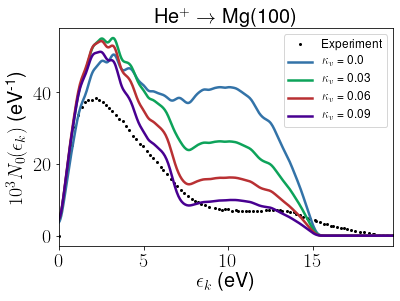

In [6]:
element = "Mg"
surface = "100"
ion = "He"
plasmon_range = np.arange(0.0, 0.1, 0.03)

quotas = QuotasCalculator.from_file(
    os.path.join(data_dir, element + "_" + surface + "_pbe.json")
)
exp_see = exp_data[element][ion]

# Plot the yield densities
fig, ax = plt.subplots()
ax.plot(exp_see["energy"], exp_see["yield"], "o", 
        color=color0, markersize=2)

rc_font_dict = {"size": 20, "family": "sans-serif", 
                "sans-serif": ['Helvetica', 'Verdana', 'Tahoma', 'Lucida Grande']}
plt.rc("font", **rc_font_dict)
font_dict = {"size": 20, "family": "sans-serif", "name": 'DejaVu Sans'}
legend_items = ["Experiment"]

color_list = [color1, color2, color3, color5]

for plasmon, color in zip(plasmon_range, color_list):
    
    legend_items.append("$\kappa_v$ = " + str(round(plasmon, 2)))
    plasmon_pars={"bulk_parameter": plasmon, "surface_parameter": 0}
    quotas.set_up_plasmon_probabilities(**plasmon_pars)
    
    calc_see = quotas.calculate_yield(ionization_energies[ion])
    
    ax.plot(calc_see["energy"], 
             get_smeared_densities(calc_see["energy"], 
                                   calc_see["yield"]*1e3, 
                                   density_smearing),
            color=color, linewidth=2.5)

# Configure the axes
ax.set_xlim([0, max(exp_see["energy"])])
ax.set_xlabel(r"$\epsilon_k$ (eV)")
ax.set_ylabel(r"$10^3 N_0 (\epsilon_k)$ (eV\textsuperscript{-1})")
ax.set_title(ion + r"$^+$ $\rightarrow$ " + element + "(" + surface + ")", 
             fontdict=font_dict)
plt.legend(legend_items, fontsize=12)
tikzplotlib.save(os.path.join(figures_dir, "bulk_plasmon_inf.tex"))

## Ne$^+$ $\rightarrow$ Be (110)

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get_xticks("minor"), obj.get_xticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:216: MatplotlibDeprecationWarning: Passing the minor parameter of get_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor y", obj.get_yticks("minor"), obj.get_yticklabels("minor")


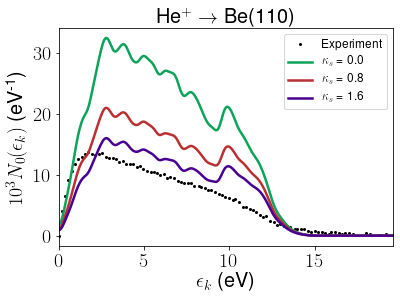

In [7]:
element = "Be"
surface = "110"
ion = "He"
plasmon_range = np.arange(0.0, 1.7, 0.8)

quotas = QuotasCalculator.from_file(
    os.path.join(data_dir, element + "_" + surface + "_pbe.json")
)
exp_see = exp_data[element][ion]

# Plot the yield densities
fig, ax = plt.subplots()
ax.plot(exp_see["energy"], exp_see["yield"], "o", 
        color=color0, markersize=2)

rc_font_dict = {"size": 20, "family": "sans-serif", 
                "sans-serif": ['Helvetica', 'Verdana', 'Tahoma', 'Lucida Grande']}
plt.rc("font", **rc_font_dict)
font_dict = {"size": 20, "family": "sans-serif", "name": 'DejaVu Sans'}
legend_items = ["Experiment"]

color_list = [color2, color3, color5]

for plasmon, color in zip(plasmon_range, color_list):
    
    legend_items.append("$\kappa_s$ = " + str(round(plasmon, 1)))
    plasmon_pars={"bulk_parameter": 0, "surface_parameter": plasmon}
    quotas.set_up_plasmon_probabilities(**plasmon_pars)
    
    calc_see = quotas.calculate_yield(ionization_energies[ion])
    
    ax.plot(calc_see["energy"], 
             get_smeared_densities(calc_see["energy"], 
                                   calc_see["yield"]*1e3,
                                   density_smearing),
           color=color, linewidth=2.5)

# Configure the axes
ax.set_xlim([0, max(exp_see["energy"])])
ax.set_xlabel(r"$\epsilon_k$ (eV)")
ax.set_ylabel(r"$10^3 N_0 (\epsilon_k)$ (eV\textsuperscript{-1})")
ax.set_title(ion + r"$^+$ $\rightarrow$ " + element + "(" + surface + ")", 
             fontdict=font_dict)
plt.legend(legend_items, fontsize=12)
tikzplotlib.save(os.path.join(figures_dir, "surface_plasmon_inf.tex"))

## Energy loss functions

In [8]:
Al_quotas = QuotasCalculator.from_file(os.path.join(data_dir, "Al_100_pbe.json"))
Mg_quotas = QuotasCalculator.from_file(os.path.join(data_dir, "Mg_100_pbe.json"))
Be_quotas = QuotasCalculator.from_file(os.path.join(data_dir, "Be_100_pbe.json"))

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get_xticks("minor"), obj.get_xticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:216: MatplotlibDeprecationWarning: Passing the minor parameter of get_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor y", obj.get_yticks("minor"), obj.get_yticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get

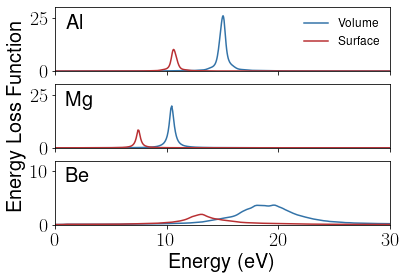

In [9]:
fig, ax = plt.subplots(3, sharex=True)

ax[0].plot(Al_quotas.dieltensor.energies,
           Al_quotas.dieltensor.get_loss_function(),
           color=color1)
ax[1].plot(Mg_quotas.dieltensor.energies, 
           Mg_quotas.dieltensor.get_loss_function(),
           color=color1)
ax[2].plot(Be_quotas.dieltensor.energies, 
           Be_quotas.dieltensor.get_loss_function(),
           color=color1)
ax[0].plot(Al_quotas.dieltensor.energies, 
           Al_quotas.dieltensor.get_loss_function(surface=True),
           color=color3)
ax[1].plot(Mg_quotas.dieltensor.energies, 
           Mg_quotas.dieltensor.get_loss_function(surface=True),
           color=color3)
ax[2].plot(Be_quotas.dieltensor.energies, 
           Be_quotas.dieltensor.get_loss_function(surface=True),
           color=color3)

ax[0].set_ylim([0, 30]);
ax[1].set_ylim([0, 30]);
ax[2].set_ylim([0, 12]);
ax[0].set_xlim([0, 30]);

ax[0].text(1, 20, "Al")
ax[1].text(1, 20, "Mg")
ax[2].text(1, 8, "Be")
ax[2].set_xlabel("Energy (eV)")
ax[1].set_ylabel("Energy Loss Function")
ax[0].legend(["Volume", "Surface"], fontsize=12, frameon=False)
tikzplotlib.save("test.tex")
plt.savefig(os.path.join(figures_dir, "energy_loss.eps"), format="eps", bbox_inches="tight")

## Results

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get_xticks("minor"), obj.get_xticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:216: MatplotlibDeprecationWarning: Passing the minor parameter of get_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor y", obj.get_yticks("minor"), obj.get_yticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get

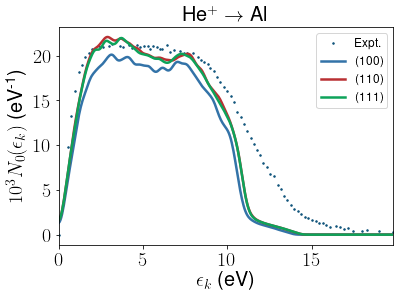

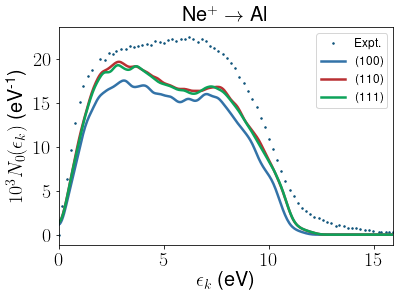

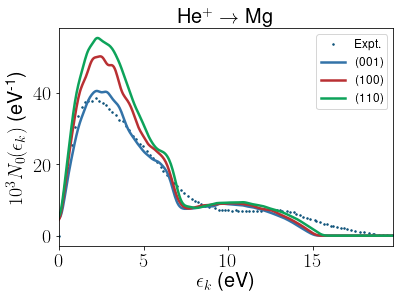

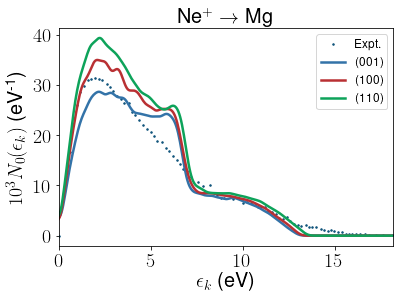

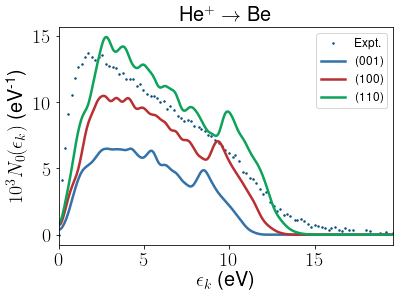

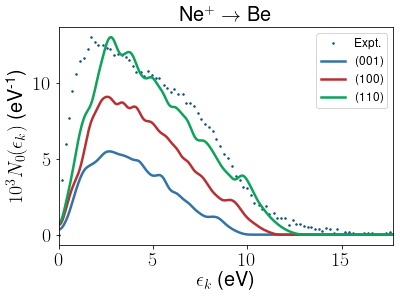

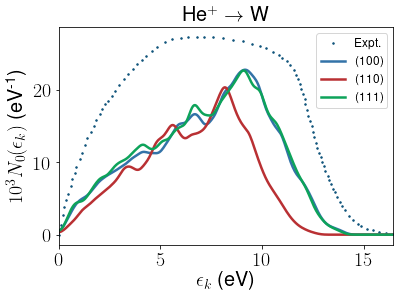

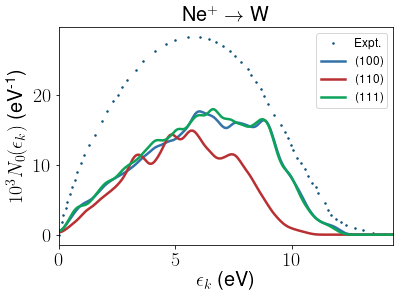

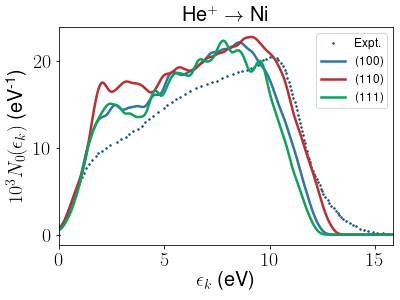

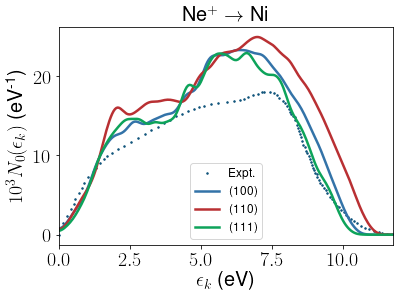

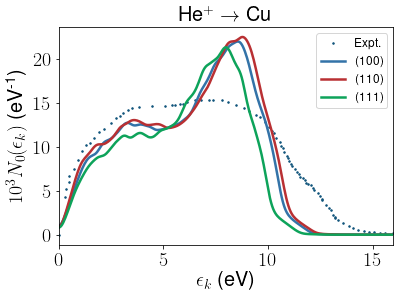

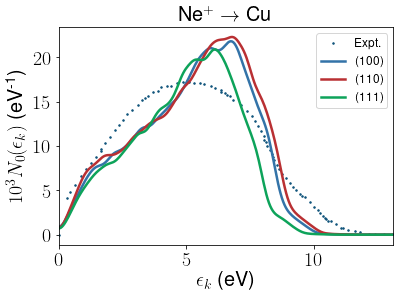

In [10]:
color_list = [color1, color3, color2]

for element in ["Al", "Mg", "Be", "W", "Ni", "Cu"]:
    
    surfaces = structure_dict[element]["slabs"].keys()
    
    for ion in ["He", "Ne"]:
        exp_see = exp_data[element][ion]

        # Plot the yield densities
        fig, ax = plt.subplots()
        ax.plot(exp_see["energy"], exp_see["yield"], "o", 
                color="#11557C", markersize=1.5)

        rc_font_dict = {"size": 20, "family": "sans-serif", 
                        "sans-serif": ['Helvetica', 'Verdana', 'Tahoma', 'Lucida Grande']}
        plt.rc("font", **rc_font_dict)
        font_dict = {"size": 20, "family": "sans-serif", "name": 'DejaVu Sans'}
        legend_items = ["Expt."]

        for surface, color in zip(surfaces, color_list):

            quotas = QuotasCalculator.from_file(
                os.path.join(data_dir, element + "_" + surface + "_pbe.json")
            )

            legend_items.append("(" + surface + ")")

            calc_see = quotas.calculate_yield(ionization_energies[ion])

            ax.plot(calc_see["energy"], 
                     get_smeared_densities(calc_see["energy"], 
                                           calc_see["yield"] * 1e3,
                                           density_smearing),
                    color=color, linewidth=2.5)

        # Configure the axes 
        ax.set_xlim([0, max(exp_see["energy"])])
        ax.set_xlabel(r"$\epsilon_k$ (eV)")
        ax.set_ylabel(r"$10^3 N_0 (\epsilon_k)$ (eV\textsuperscript{-1})")
        ax.set_title(ion + r"$^+$ $\rightarrow$ " + element, 
                     fontdict=font_dict)
        plt.legend(legend_items, fontsize=12)
        tikzplotlib.save(os.path.join(figures_dir, ion + element + "_results.tex"))


## Influence of d-orbitals on Cu(110)

Total yield = 0.14517549531215598
Total yield (high d) = 0.14570659501419664


/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get_xticks("minor"), obj.get_xticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:216: MatplotlibDeprecationWarning: Passing the minor parameter of get_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor y", obj.get_yticks("minor"), obj.get_yticklabels("minor")


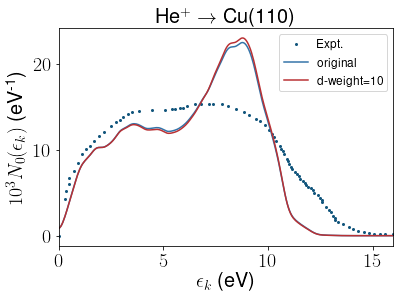

In [11]:
element = "Cu"
ion = "He"
surface = "110"
d_weight = 10

exp_see = exp_data[element][ion]

q = QuotasCalculator.from_file(os.path.join(data_dir, element + "_" + surface + "_pbe.json"))

see = q.calculate_yield(ionization_energies[ion])
see_d = q.calculate_yield(ionization_energies[ion], d_electron_weight=d_weight)
print("Total yield = " + str(see["total_yield"]))
print("Total yield (high d) = " + str(see_d["total_yield"]))  

rc_font_dict = {"size": 20, "family": "sans-serif", 
                "sans-serif": ['Helvetica', 'Verdana', 'Tahoma', 'Lucida Grande']}
plt.rc("font", **rc_font_dict)
font_dict = {"size": 20, "family": "sans-serif", "name": 'DejaVu Sans'}
legend_items = ["Expt.", "original", "d-weight=10"]

# Plot the yield densities
fig, ax = plt.subplots()
ax.plot(exp_see["energy"], exp_see["yield"], "o", 
        color="#11557C", markersize=2)
ax.plot(see["energy"], 
         get_smeared_densities(see["energy"], 
                               see["yield"] * 1e3,
                               density_smearing), color=color1)
ax.plot(see_d["energy"], 
         get_smeared_densities(see_d["energy"], 
                               see_d["yield"] * 1e3,
                               density_smearing), color=color3)

# Configure the axes
ax.set_xlim([0, max(exp_see["energy"])])
ax.set_xlabel(r"$\epsilon_k$ (eV)")
ax.set_ylabel(r"$10^3 N_0 (\epsilon_k)$ (eV\textsuperscript{-1})")
ax.set_title(ion + r"$^+$ $\rightarrow$ " + element + "(110)", 
             fontdict=font_dict)
plt.legend(legend_items, fontsize=12)
tikzplotlib.save(os.path.join(figures_dir, "d_influence.tex"))

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get_xticks("minor"), obj.get_xticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:216: MatplotlibDeprecationWarning: Passing the minor parameter of get_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor y", obj.get_yticks("minor"), obj.get_yticklabels("minor")


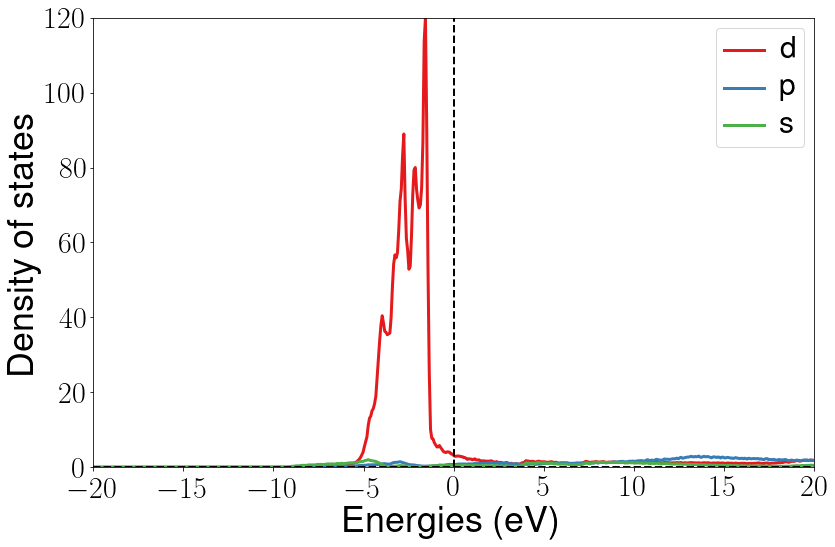

In [12]:
element = "Cu"
surface = "110"

q = QuotasCalculator.from_file(os.path.join(data_dir, element + "_" + surface + "_pbe.json"))
cdos = q.cdos
dpl = DosPlotter()

dpl.add_dos_dict(cdos.get_element_spd_dos(element.split("_")[0]))
plt = dpl.get_plot(xlim=[-20, 20],ylim=[0, 120])
tikzplotlib.save(os.path.join(figures_dir, "Cu_110_pdos.tex"))

## PDOS of low yield elements

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get_xticks("minor"), obj.get_xticklabels("minor")
/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/tikzplotlib/_axes.py:216: MatplotlibDeprecationWarning: Passing the minor parameter of get_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor y", obj.get_yticks("minor"), obj.get_yticklabels("minor")


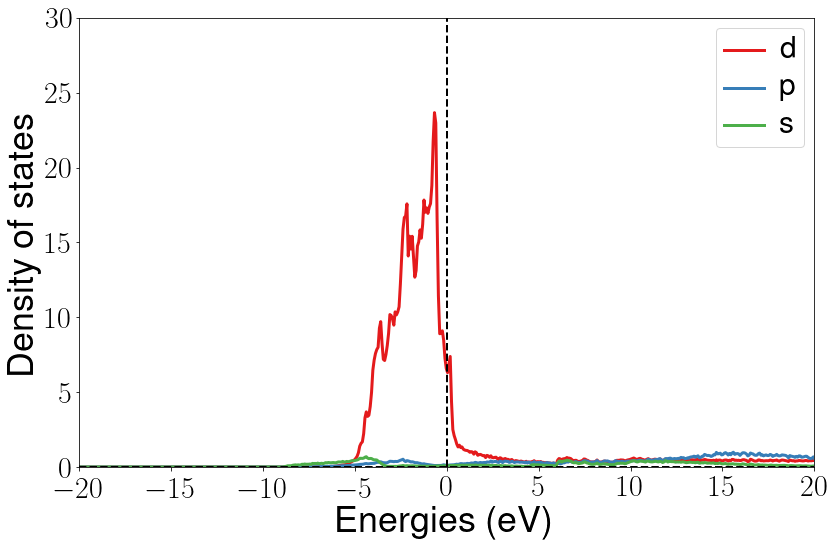

In [13]:
element = "Ni"
surface = "100"

q = QuotasCalculator.from_file(os.path.join(data_dir, element + "_" + surface + "_pbe.json"))
cdos = q.cdos
dpl = DosPlotter()

dpl.add_dos_dict(cdos.get_element_spd_dos(element.split("_")[0]))
plt = dpl.get_plot(xlim=[-20, 20],ylim=[0, 30])
tikzplotlib.save(os.path.join(figures_dir, element + "_"+ surface + "_pdos_new.tex"))